In [1]:
from pynucastro import Library, PythonNetwork, ReacLibLibrary, Composition, RateCollection
from pynucastro.rates import DerivedRate

In [2]:
all_reactions = ReacLibLibrary()
fwd_reactions = all_reactions.derived_forward()

all_nuclei = ['cr48', 'mn51', 'fe52', 'ni56', 'p', 'n', 'he4', 'co55',
              'fe54','fe55', 'fe56', 'cr56', 'mn56', 'fe53', 'mn52', 'co56', 'cr49']

fwd_rates_lib = fwd_reactions.linking_nuclei(nuclist=all_nuclei, with_reverse=False)

derived = []
for r in fwd_rates_lib.get_rates():
    d = DerivedRate(rate=r, compute_Q=False, use_pf=True)
    derived.append(d)

der_rates_lib = Library(rates=derived)
full_library = fwd_rates_lib + der_rates_lib

# full_library.remove_rate(rate="fe55 + p --> n + co55 <derived_reaclib__>")
# full_library.remove_rate(rate="co55 + n --> p + fe55 <ths8_reaclib__>")
# full_library.remove_rate(rate="mn51 + he4 --> co55 <ths8_reaclib__>")
# full_library.remove_rate(rate="co55 --> he4 + mn51 <derived_reaclib__>")

# weak_rates = []
# weak_rates.append(all_reactions.get_rate("n --> p <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("co55 --> fe55 <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("cr56 --> mn56 <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("mn56 --> fe56 <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("fe52 --> mn52 <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("co56 --> fe56 <wc12_reaclib_weak_>"))
# weak_rates.append(all_reactions.get_rate("ni56 --> co56 <wc12_reaclib_weak_>"))
# weak_lib = Library(rates=weak_rates)
# full_library += weak_lib


print(full_library)

Cr48 + n ⟶ Cr49 + 𝛾            [Q =  10.58 MeV] (cr48 + n --> cr49 <ths8_reaclib__>)
Cr48 + He4 ⟶ p + Mn51          [Q =   0.56 MeV] (cr48 + he4 --> p + mn51 <ths8_reaclib__>)
Cr48 + He4 ⟶ Fe52 + 𝛾          [Q =   7.94 MeV] (cr48 + he4 --> fe52 <ths8_reaclib__>)
Cr49 + He4 ⟶ p + Mn52          [Q =   0.51 MeV] (cr49 + he4 --> p + mn52 <ths8_reaclib__>)
Cr49 + He4 ⟶ n + Fe52          [Q =  -2.65 MeV] (cr49 + he4 --> n + fe52 <derived_reaclib__>)
Cr49 ⟶ n + Cr48                [Q = -10.58 MeV] (cr49 --> n + cr48 <derived_reaclib__>)
Cr49 + He4 ⟶ Fe53 + 𝛾          [Q =   8.04 MeV] (cr49 + he4 --> fe53 <ths8_reaclib__>)
Cr56 + p ⟶ n + Mn56            [Q =   0.83 MeV] (cr56 + p --> n + mn56 <rath_reaclib__>)
Mn51 + n ⟶ Mn52 + 𝛾            [Q =  10.54 MeV] (mn51 + n --> mn52 <ths8_reaclib__>)
Mn51 + p ⟶ He4 + Cr48          [Q =  -0.56 MeV] (mn51 + p --> he4 + cr48 <derived_reaclib__>)
Mn51 + p ⟶ Fe52 + 𝛾            [Q =   7.38 MeV] (mn51 + p --> fe52 <ths8_reaclib__>)
Mn51 + He4 ⟶ p + Fe54   

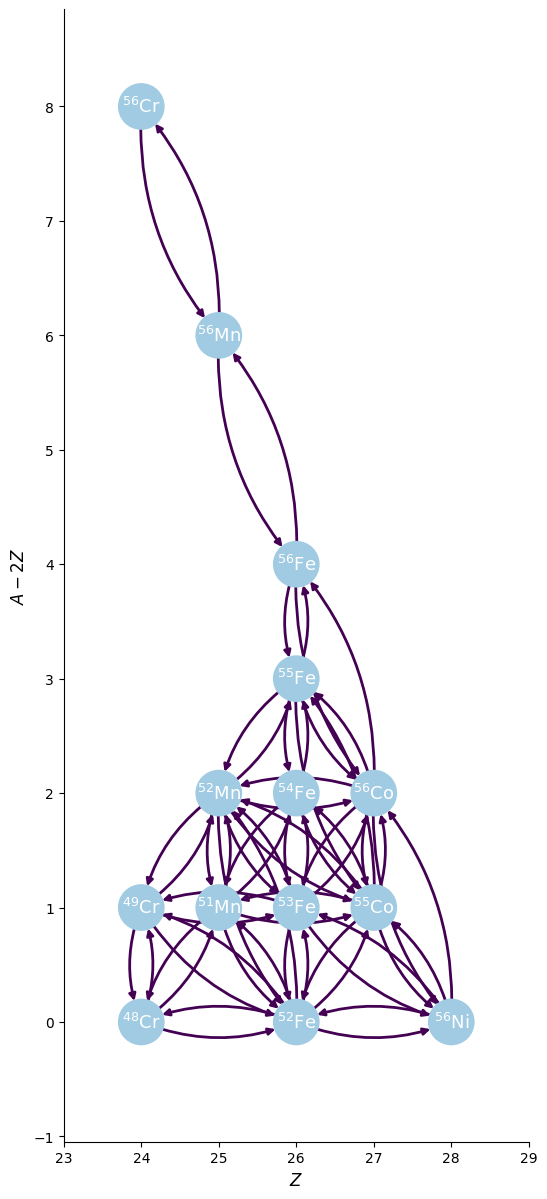

In [3]:
rc_raw = RateCollection(libraries=full_library)
rc_raw.plot(rotated=True, curved_edges=True, size=(600,1500))

In [4]:
pynet = PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=True)
pynet.write_network('full_nuclide_ap21.py')

# This Line separates the networks

In [5]:
all_reactions = ReacLibLibrary()
#fwd_reactions = all_reactions.derived_forward()

all_nuclei = ['cr48', 'mn51', 'fe52', 'ni56', 'p', 'n', 'he4', 'co55'
              'fe54','fe55', 'fe54', 'fe56', 'cr56', 'mn56']

full_library = all_reactions.linking_nuclei(nuclist=all_nuclei, with_reverse=True)

rates = []
for r in full_library.get_rates():
    if r.weak:
        continue
    else:
        rates.append(r)

full_library = Library(rates=rates)
full_library.remove_rate(rate="co55 + n --> p + fe55 <ths8_reaclib__>")
full_library.remove_rate(rate="fe55 + p --> n + co55 <ths8_reaclib__reverse>")
full_library.remove_rate(rate="mn51 + he4 --> co55 <ths8_reaclib__>") 
full_library.remove_rate(rate="co55 --> he4 + mn51 <ths8_reaclib__reverse>")

print(full_library)

Cr48 + He4 ⟶ p + Mn51          [Q =   0.56 MeV] (cr48 + he4 --> p + mn51 <ths8_reaclib__>)
Cr48 + He4 ⟶ Fe52 + 𝛾          [Q =   7.94 MeV] (cr48 + he4 --> fe52 <ths8_reaclib__>)
Cr56 + p ⟶ n + Mn56            [Q =   0.83 MeV] (cr56 + p --> n + mn56 <rath_reaclib__>)
Mn51 + p ⟶ Fe52 + 𝛾            [Q =   7.38 MeV] (mn51 + p --> fe52 <ths8_reaclib__>)
Mn51 + He4 ⟶ p + Fe54          [Q =   3.15 MeV] (mn51 + he4 --> p + fe54 <ths8_reaclib__>)
Mn56 + p ⟶ n + Fe56            [Q =   2.91 MeV] (mn56 + p --> n + fe56 <rath_reaclib__>)
Fe52 + He4 ⟶ p + Co55          [Q =   0.83 MeV] (fe52 + he4 --> p + co55 <ths8_reaclib__>)
Fe52 + He4 ⟶ Ni56 + 𝛾          [Q =   8.00 MeV] (fe52 + he4 --> ni56 <ths8_reaclib__>)
Fe54 + n ⟶ Fe55 + 𝛾            [Q =   9.30 MeV] (fe54 + n --> fe55 <ks03_reaclib__>)
Fe54 + p ⟶ Co55 + 𝛾            [Q =   5.06 MeV] (fe54 + p --> co55 <ths8_reaclib__>)
Fe55 + n ⟶ Fe56 + 𝛾            [Q =  11.20 MeV] (fe55 + n --> fe56 <ks03_reaclib__>)
Co55 + p ⟶ Ni56 + 𝛾            [Q =

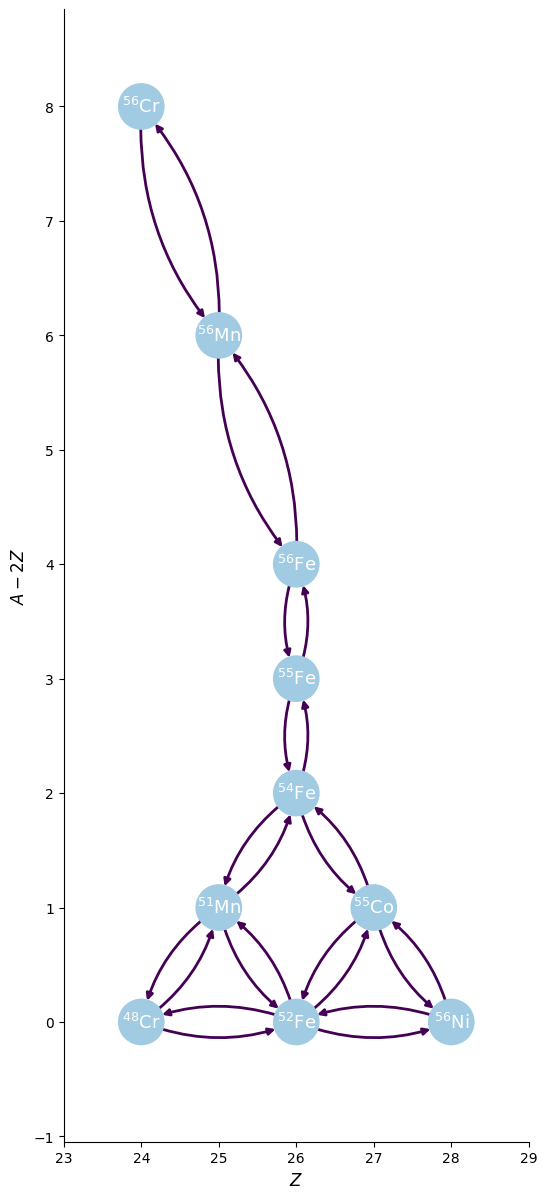

In [6]:
rc_raw = RateCollection(libraries=full_library)
rc_raw.plot(rotated=True, curved_edges=True, size=(600,1500))

In [7]:
pynet = PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=True)
pynet.write_network('full_nuclide_ap21_r.py')